
✅ **Corrected EV Sales Forecast (High Growth Scenario):**
           ds  Final_Forecast
0  2010-01-01    9.280415e+04
1  2011-01-01    8.682297e+04
2  2012-01-01    1.281113e+05
3  2013-01-01    2.553993e+05
4  2014-01-01    3.290337e+05
5  2015-01-01    5.553676e+05
6  2016-01-01    9.226968e+05
7  2017-01-01    1.392519e+06
8  2018-01-01    2.247083e+06
9  2019-01-01    3.192849e+06
10 2020-01-01    4.700658e+06
11 2021-01-01    7.567464e+06
12 2022-01-01    1.187283e+07
13 2023-01-01    1.782058e+07
14 2024-01-01    2.237906e+07
15 2025-01-01    2.708495e+07
16 2026-01-01    3.193395e+07
17 2027-01-01    3.698665e+07
18 2028-01-01    4.222557e+07
19 2029-01-01    4.765692e+07
20 2030-01-01    5.323644e+07

✅ **Corrected Lithium Production Forecast (High Growth Scenario):**
           ds  Final_Forecast
0  1995-01-01    1.391093e+04
1  1996-01-01    1.444841e+04
2  1997-01-01    1.494174e+04
3  1998-01-01    1.563052e+04
4  1999-01-01    1.637065e+04
5  2000-01-01    1.717114e+04
6 

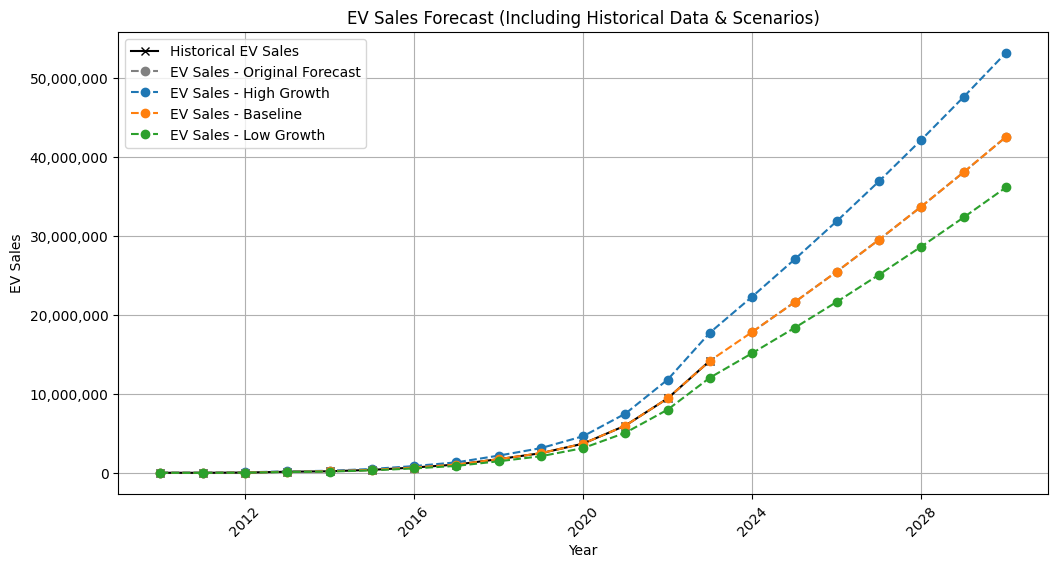

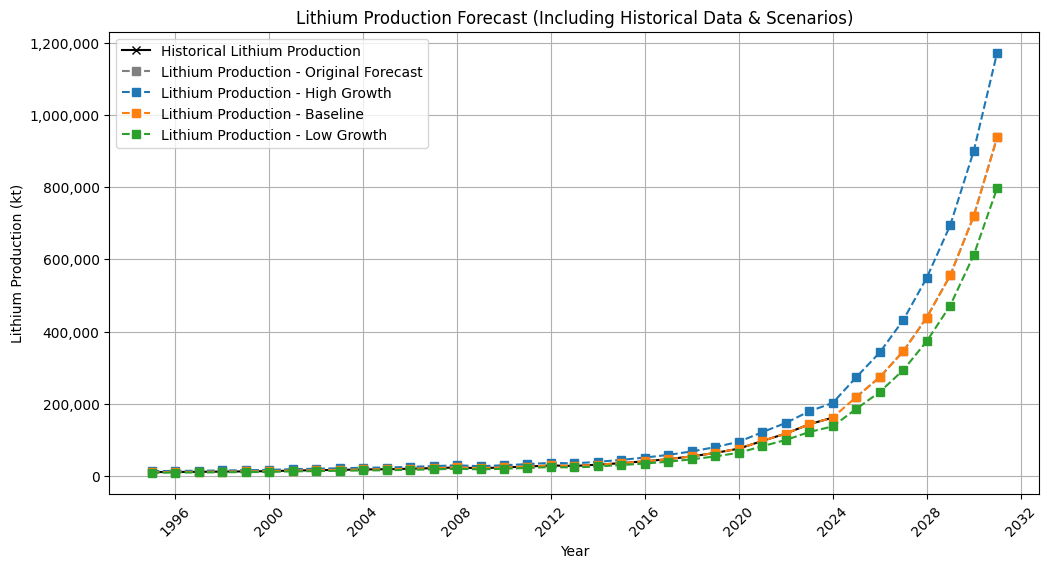

✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_EV_Sales_Forecast_High Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_EV_Sales_Forecast_Baseline.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_EV_Sales_Forecast_Low Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_Lithium_Production_Forecast_High Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_Lithium_Production_Forecast_Baseline.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Updated_Lithium_Production_Forecast_Low Growth.csv

✅ All Updated Forecasts Processed Successfully! 🚀


In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ==================================================
# ✅ Load EV Sales Forecast & Lithium Production Forecast
# ==================================================
file_path_predicted_ev = r"C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\EV_forecast_2030.csv"
file_path_lithium_forecast = r"C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output\Lithium_forecast_final_2030.csv"

# ✅ Load CSVs with error handling
try:
    predicted_ev_data = pd.read_csv(file_path_predicted_ev, encoding="utf-8")
    lithium_forecast_data = pd.read_csv(file_path_lithium_forecast, encoding="utf-8")
except UnicodeDecodeError:
    predicted_ev_data = pd.read_csv(file_path_predicted_ev, encoding="latin1")
    lithium_forecast_data = pd.read_csv(file_path_lithium_forecast, encoding="latin1")

# ==================================================
# ✅ Ensure Proper Column Naming & Formatting
# ==================================================
if "year" in predicted_ev_data.columns:
    predicted_ev_data.rename(columns={"year": "ds"}, inplace=True)

if "predicted_ev_sales" in predicted_ev_data.columns:
    predicted_ev_data.rename(columns={"predicted_ev_sales": "yhat"}, inplace=True)

if "year" in lithium_forecast_data.columns:
    lithium_forecast_data.rename(columns={"year": "ds"}, inplace=True)

if "predicted_lithium" in lithium_forecast_data.columns:
    lithium_forecast_data.rename(columns={"predicted_lithium": "yhat"}, inplace=True)

# ✅ Convert 'ds' to datetime format
predicted_ev_data["ds"] = pd.to_datetime(predicted_ev_data["ds"], errors="coerce")
lithium_forecast_data["ds"] = pd.to_datetime(lithium_forecast_data["ds"], errors="coerce")

# ✅ Convert 'yhat' to numeric
predicted_ev_data["yhat"] = pd.to_numeric(predicted_ev_data["yhat"], errors="coerce")
lithium_forecast_data["yhat"] = pd.to_numeric(lithium_forecast_data["yhat"], errors="coerce")

# ==================================================
# ✅ Define **Scenario Adjustments**
# ==================================================
scenarios = {
    "High Growth": 1.25,   # 25% increase
    "Baseline": 1.0,       # No change
    "Low Growth": 0.85     # 15% decrease
}

# ✅ Apply Scenario-Based Adjustments
scenario_forecasts_ev, scenario_forecasts_lithium = {}, {}

for scenario, factor in scenarios.items():
    ev_scenario_data = predicted_ev_data.copy()
    li_scenario_data = lithium_forecast_data.copy()
    
    # Apply adjustment factors
    ev_scenario_data["Final_Forecast"] = ev_scenario_data["yhat"] * factor
    li_scenario_data["Final_Forecast"] = li_scenario_data["yhat"] * factor

    # Prevent negative values
    ev_scenario_data["Final_Forecast"] = ev_scenario_data["Final_Forecast"].clip(lower=0)
    li_scenario_data["Final_Forecast"] = li_scenario_data["Final_Forecast"].clip(lower=0)
    
    # Store results
    scenario_forecasts_ev[scenario] = ev_scenario_data
    scenario_forecasts_lithium[scenario] = li_scenario_data

# ==================================================
# ✅ Print Corrected Predictions for ALL Scenarios
# ==================================================
for scenario in scenarios.keys():
    print(f"\n✅ **Corrected EV Sales Forecast ({scenario} Scenario):**")
    print(scenario_forecasts_ev[scenario][["ds", "Final_Forecast"]])

    print(f"\n✅ **Corrected Lithium Production Forecast ({scenario} Scenario):**")
    print(scenario_forecasts_lithium[scenario][["ds", "Final_Forecast"]])

# ==================================================
# ✅ Plot EV Sales Forecasts (Including Historical Data)
# ==================================================
plt.figure(figsize=(12, 6))

# Separate historical and forecasted data
historical_data = predicted_ev_data[predicted_ev_data["ds"].dt.year < 2024]
forecast_data = predicted_ev_data[predicted_ev_data["ds"].dt.year >= 2024]

# Plot historical data with a solid line
plt.plot(historical_data["ds"], historical_data["yhat"], label="Historical EV Sales", color='black', linestyle='-', marker='x')

# Plot original forecast
plt.plot(forecast_data["ds"], forecast_data["yhat"], label="EV Sales - Original Forecast", color='grey', linestyle='--', marker='o')

# Plot each scenario's forecast
for scenario, data in scenario_forecasts_ev.items():
    plt.plot(data["ds"], data["Final_Forecast"], label=f"EV Sales - {scenario}", linestyle='--', marker='o')

plt.title("EV Sales Forecast (Including Historical Data & Scenarios)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# ==================================================
# ✅ Plot Lithium Production Forecasts (Including Historical Data)
# ==================================================
plt.figure(figsize=(12, 6))

# Separate historical and forecasted data
historical_data = lithium_forecast_data[lithium_forecast_data["ds"].dt.year < 2024]
forecast_data = lithium_forecast_data[lithium_forecast_data["ds"].dt.year >= 2024]

# Plot historical data
plt.plot(historical_data["ds"], historical_data["yhat"], label="Historical Lithium Production", color='black', linestyle='-', marker='x')

# Plot original lithium production forecast
plt.plot(forecast_data["ds"], forecast_data["yhat"], label="Lithium Production - Original Forecast", color='grey', linestyle='--', marker='s')

# Plot each scenario's forecast
for scenario, data in scenario_forecasts_lithium.items():
    plt.plot(data["ds"], data["Final_Forecast"], label=f"Lithium Production - {scenario}", linestyle='--', marker='s')

plt.title("Lithium Production Forecast (Including Historical Data & Scenarios)")
plt.xlabel("Year")
plt.ylabel("Lithium Production (kt)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# ==================================================
# ✅ Save Updated Forecast Results to CSV
# ==================================================
output_directory = r"C:\Users\MSI\Desktop\Critical_mineral - Lithium\Output"

# Ensure the directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save EV Sales Forecasts
for scenario, data in scenario_forecasts_ev.items():
    file_path = os.path.join(output_directory, f"Updated_EV_Sales_Forecast_{scenario}.csv")
    data.to_csv(file_path, index=False)
    print(f"✅ Saved: {file_path}")

# Save Lithium Production Forecasts
for scenario, data in scenario_forecasts_lithium.items():
    file_path = os.path.join(output_directory, f"Updated_Lithium_Production_Forecast_{scenario}.csv")
    data.to_csv(file_path, index=False)
    print(f"✅ Saved: {file_path}")

print("\n✅ All Updated Forecasts Processed Successfully! 🚀")
